In [ ]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data = pd.get_dummies(data, columns=['Gender'])

In [ ]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [ ]:
data.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
Gender_Female                 0
Gender_Male                   0
dtype: int64

In [ ]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna((data['Albumin_and_Globulin_Ratio'].mean()))

In [ ]:
data.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Liver_Problem                 0
Gender_Female                 0
Gender_Male                   0
dtype: int64

In [ ]:
X = data.drop(['Liver_Problem'],axis=True)

y = data[['Liver_Problem']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_pred = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test,log_pred)
cm

array([[66,  7],
       [19,  8]])

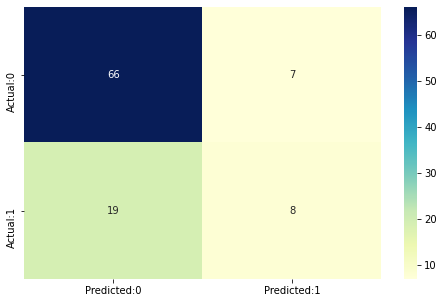

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,log_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           1       0.78      0.90      0.84        73
           2       0.53      0.30      0.38        27

    accuracy                           0.74       100
   macro avg       0.65      0.60      0.61       100
weighted avg       0.71      0.74      0.71       100



In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,log_pred)

0.74

In [ ]:
metrics.recall_score(y_test,log_pred)

0.9041095890410958

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
rfc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81        73
           2       0.48      0.48      0.48        27

    accuracy                           0.72       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.72      0.72      0.72       100



In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[59 14]
 [14 13]]


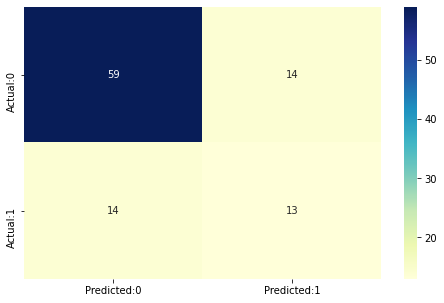

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,rfc_pred)
conf_matrix=pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
TN=cm1[0,0]
TP=cm1[1,1]
FN=cm1[1,0]
FP=cm1[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
sensitivity

0.48148148148148145

In [ ]:
specificity

0.8082191780821918

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.72 
 The Missclassification = 1-Accuracy =  0.28 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.48148148148148145 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8082191780821918 
 Positive Predictive value = TP/(TP+FP) =  0.48148148148148145 
 Negative predictive Value = TN/(TN+FN) =  0.8082191780821918 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  2.5105820105820107 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.6415568110483366


In [ ]:
metrics.precision_score(y_test,rfc_pred)

0.8082191780821918

In [ ]:
Precision = TP / (TP + FP)
Precision

0.48148148148148145

In [ ]:
metrics.recall_score(y_test,rfc_pred)

0.8082191780821918

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state = 42)

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           1       0.77      0.74      0.76        73
           2       0.37      0.41      0.39        27

    accuracy                           0.65       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.66      0.65      0.66       100



In [ ]:
print(confusion_matrix(y_test,dtc_pred)) 

[[54 19]
 [16 11]]


In [ ]:
precisionn = metrics.precision_score(y_test,dtc_pred)
precisionn

0.7714285714285715

In [ ]:
recalll = metrics.recall_score(y_test,dtc_pred)
recalll

0.7397260273972602

In [ ]:
metrics.f1_score(y_test,dtc_pred)

0.7552447552447553

In [ ]:
f1_scoreee = 2 * (precisionn * recalll)/ (precisionn + recalll)
f1_scoreee

0.7552447552447553

In [ ]:
metrics.roc_auc_score(y_test,dtc_pred)

0.5735667174023339